In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('train.csv')

In [3]:
print(train.head())

   id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1  


In [4]:
train=train.drop(['id'],axis=1)
train=train.dropna()
train=train.drop_duplicates()
train=train.dropna()

In [5]:
train=train[0:1000]

In [6]:
InDep=train['title']+train['author']+train['text']

In [7]:

InDep[0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted ItDarrell LucusHouse Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of 

In [8]:

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 1147
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   1000 non-null   object
 1   author  1000 non-null   object
 2   text    1000 non-null   object
 3   label   1000 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 71.4+ KB


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
countvectorizer= CountVectorizer()

In [10]:
FitValues = countvectorizer.fit_transform(InDep.values)
transformer = TfidfTransformer(smooth_idf=False)
tfidf = transformer.fit_transform(FitValues)
FitValues

<1000x40497 sparse matrix of type '<class 'numpy.int64'>'
	with 365143 stored elements in Compressed Sparse Row format>

In [11]:

Dep=train['label'].values

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(FitValues, Dep, random_state=0,test_size=0.1)

In [13]:
from sklearn.ensemble import RandomForestClassifier
RF= RandomForestClassifier(n_estimators=5)

RF.fit(X_train, y_train)
RF.fit(X_train,y_train)
y_pred_RF=RF.predict(X_test)

C:\Users\mrity\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\mrity\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


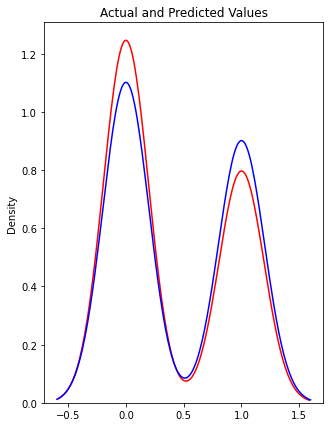

In [14]:
plt.figure(figsize=(5, 7))
ax = sns.distplot(y_test, hist=False, color="r", label="Actual ")
sns.distplot(y_pred_RF, hist=False, color="b", label="Predicted " , ax=ax)
plt.title('Actual and Predicted Values')
plt.show()
plt.close()

In [15]:
print(RF.score(X_train, y_train)*100) # Accuracy on labelled data
print(RF.score(X_test, y_test)*100) # Accuracy on non labelled data

97.22222222222221
78.0


In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_RF)

array([[47, 14],
       [ 8, 31]], dtype=int64)

In [17]:
from sklearn.tree import DecisionTreeClassifier
DTC= DecisionTreeClassifier(criterion='entropy')
DTC.fit(X_train,y_train)
y_pred_DTC=DTC.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score

LabelledData=(DTC.score(X_train, y_train)*100) # Accuracy on labelled data
UnlabelledData=(DTC.score(X_test, y_test)*100) # Accuracy on non labelled data
print(LabelledData)
print(UnlabelledData)

100.0
94.0


<BarContainer object of 2 artists>

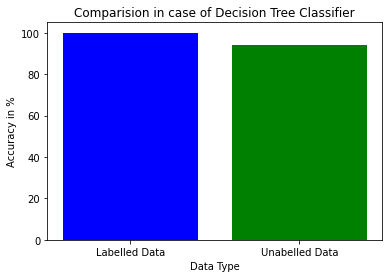

In [19]:
plt.ylabel('Accuracy in %')
plt.xlabel('Data Type')
plt.title('Comparision in case of Decision Tree Classifier')
acc=['Labelled Data','Unabelled Data']
ar1=[LabelledData,UnlabelledData]

plt.bar(acc,ar1,color=('b','g'))

In [20]:

confusion_matrix(y_test,y_pred_DTC)

array([[59,  2],
       [ 4, 35]], dtype=int64)

In [21]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(X_train, y_train)
y_pred_NB=NB.predict(X_test)

In [22]:
xz=(NB.score(X_train, y_train)*100) # Accuracy on labelled data
zx=(NB.score(X_test, y_test)*100) # Accuracy on non labelled data
print(xz)
print(zx)

98.88888888888889
93.0


<BarContainer object of 2 artists>

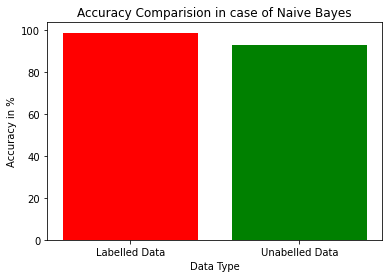

In [23]:
plt.ylabel('Accuracy in %')
plt.xlabel('Data Type')
plt.title('Accuracy Comparision in case of Naive Bayes')
acc=['Labelled Data','Unabelled Data']
ar1=[xz,zx]


plt.bar(acc,ar1,color=('r','g'))

In [24]:
confusion_matrix(y_test,y_pred_NB)

array([[60,  1],
       [ 6, 33]], dtype=int64)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(InDep, Dep, random_state=0,test_size=0.1)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english',max_df=0.7)
tfidftrain=tfidf_vectorizer.fit_transform(X_train)
tfidftest=tfidf_vectorizer.transform(X_test)

In [27]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidftrain,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [28]:
from sklearn.metrics import accuracy_score
y_pred=pac.predict(tfidftest)
score=accuracy_score(y_test,y_pred)
print(score*100)

97.0


In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred, labels=[0,1])

array([[58,  3],
       [ 0, 39]], dtype=int64)

In [37]:
#Why the Truth Might Get You Fired
input_data = [input()]
vectorized_input_data = tfidf_vectorizer.transform(input_data)
prediction = pac.predict(vectorized_input_data)
print(prediction)

Why the Truth Might Get You Fired
[1]


In [ ]:
input_data = [input()]
vectorized_input_data = tfidf_vectorizer.transform(input_data)
prediction = pac.predict(vectorized_input_data)
print(prediction)